In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the Dataset

In [3]:
data = pd.read_csv("transformed_data.csv")
data2 = pd.read_csv("raw_data.csv")

In [4]:
data.head()

CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754

In [5]:
data2.head()

iso_code     location        date  total_cases  total_deaths  \
0      AFG  Afghanistan  2019-12-31          0.0           0.0   
1      AFG  Afghanistan  2020-01-01          0.0           0.0   
2      AFG  Afghanistan  2020-01-02          0.0           0.0   
3      AFG  Afghanistan  2020-01-03          0.0           0.0   
4      AFG  Afghanistan  2020-01-04          0.0           0.0   

   stringency_index  population  gdp_per_capita  human_development_index  \
0               0.0    38928341        1803.987                    0.498   
1               0.0    38928341        1803.987                    0.498   
2               0.0    38928341        1803.987                    0.498   
3               0.0    38928341        1803.987                    0.498   
4               0.0    38928341        1803.987                    0.498   

  Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12  Unnamed: 13  
0      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
1      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
2      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
3      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
4      #NUM!       #NUM!       #NUM!    17.477233  7.497754494

In [6]:
data["COUNTRY"].value_counts()

COUNTRY
Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: count, Length: 210, dtype: int64

In [7]:
data["COUNTRY"].value_counts().mode()

0    294
Name: count, dtype: int64

In [14]:
code = data["CODE"].unique().tolist()
country = data["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = data["POP"].unique().tolist()
gdp = []

for i in country:
    hdi.append((data.loc[data["COUNTRY"] == i, "HDI"]).sum()/294)
    tc.append((data2.loc[data2["location"] == i, "total_cases"]).sum())
    td.append((data2.loc[data2["location"] == i, "total_deaths"]).sum())
    sti.append((data.loc[data["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((data2.loc[data2["location"] == i, "population"]).sum()/294)
    
aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)), columns = ["Country Code", "Country", "Human Development Index", "Total Cases", "Total Deaths", "Stringency Index", "Population"])

In [15]:
aggregated_data.head()

Country Code      Country  Human Development Index  Total Cases  \
0          AFG  Afghanistan                 0.498000    5126433.0   
1          ALB      Albania                 0.600765    1071951.0   
2          DZA      Algeria                 0.754000    4893999.0   
3          AND      Andorra                 0.659551     223576.0   
4          AGO       Angola                 0.418952     304005.0   

   Total Deaths  Stringency Index  Population  
0      165875.0          3.049673   17.477233  
1       31056.0          3.005624   14.872537  
2      206429.0          3.195168   17.596309  
3        9850.0          2.677654   11.254996  
4       11820.0          2.965560   17.307957

#### Arranging the data as per the total no. of cases per each country

In [16]:
data = aggregated_data.sort_values(by=["Total Cases"], ascending =False)
data.head()

Country Code        Country  Human Development Index  Total Cases  \
200          USA  United States                  0.92400  746014098.0   
27           BRA         Brazil                  0.75900  425704517.0   
90           IND          India                  0.64000  407771615.0   
157          RUS         Russia                  0.81600  132888951.0   
150          PER           Peru                  0.59949   74882695.0   

     Total Deaths  Stringency Index  Population  
200    26477574.0          3.350949   19.617637  
27     14340567.0          3.136028   19.174732  
90      7247327.0          3.610552   21.045353  
157     2131571.0          3.380088   18.798668  
150     3020038.0          3.430126   17.311165

#### As we have the highest total no. of cases let us check the top 10

In [17]:
data = data.head(10)
data

Country Code         Country  Human Development Index  Total Cases  \
200          USA   United States                 0.924000  746014098.0   
27           BRA          Brazil                 0.759000  425704517.0   
90           IND           India                 0.640000  407771615.0   
157          RUS          Russia                 0.816000  132888951.0   
150          PER            Peru                 0.599490   74882695.0   
125          MEX          Mexico                 0.774000   74347548.0   
178          ESP           Spain                 0.887969   73717676.0   
175          ZAF    South Africa                 0.608653   63027659.0   
42           COL        Colombia                 0.581847   60543682.0   
199          GBR  United Kingdom                 0.922000   59475032.0   

     Total Deaths  Stringency Index  Population  
200    26477574.0          3.350949   19.617637  
27     14340567.0          3.136028   19.174732  
90      7247327.0          3.610552   21.045353  
157     2131571.0          3.380088   18.798668  
150     3020038.0          3.430126   17.311165  
125     7295850.0          3.019289   18.674802  
178     5510624.0          3.393922   17.660427  
175     1357682.0          3.364333   17.898266  
42      1936134.0          3.357923   17.745037  
199     7249573.0          3.353883   18.033340

#### As we cant have the correct GDP. lets add some of the GDP by our own. 

In [18]:
data["GDP Before Covid"] = [65279.53, 8897.49, 2100.75, 11497.65, 7027.61, 9946.03, 29564.74, 6001.40, 6424.98, 42354.41]
data["GDP During Covid"] = [63543.58, 6796.84, 1900.71, 10126.72, 6126.87, 8346.70, 27057.16, 5090.72, 5332.77, 40284.64]

In [19]:
data

Country Code         Country  Human Development Index  Total Cases  \
200          USA   United States                 0.924000  746014098.0   
27           BRA          Brazil                 0.759000  425704517.0   
90           IND           India                 0.640000  407771615.0   
157          RUS          Russia                 0.816000  132888951.0   
150          PER            Peru                 0.599490   74882695.0   
125          MEX          Mexico                 0.774000   74347548.0   
178          ESP           Spain                 0.887969   73717676.0   
175          ZAF    South Africa                 0.608653   63027659.0   
42           COL        Colombia                 0.581847   60543682.0   
199          GBR  United Kingdom                 0.922000   59475032.0   

     Total Deaths  Stringency Index  Population  GDP Before Covid  \
200    26477574.0          3.350949   19.617637          65279.53   
27     14340567.0          3.136028   19.174732           8897.49   
90      7247327.0          3.610552   21.045353           2100.75   
157     2131571.0          3.380088   18.798668          11497.65   
150     3020038.0          3.430126   17.311165           7027.61   
125     7295850.0          3.019289   18.674802           9946.03   
178     5510624.0          3.393922   17.660427          29564.74   
175     1357682.0          3.364333   17.898266           6001.40   
42      1936134.0          3.357923   17.745037           6424.98   
199     7249573.0          3.353883   18.033340          42354.41   

     GDP During Covid  
200          63543.58  
27            6796.84  
90            1900.71  
157          10126.72  
150           6126.87  
125           8346.70  
178          27057.16  
175           5090.72  
42            5332.77  
199          40284.64

## Analyzing the Spread of Covid-19

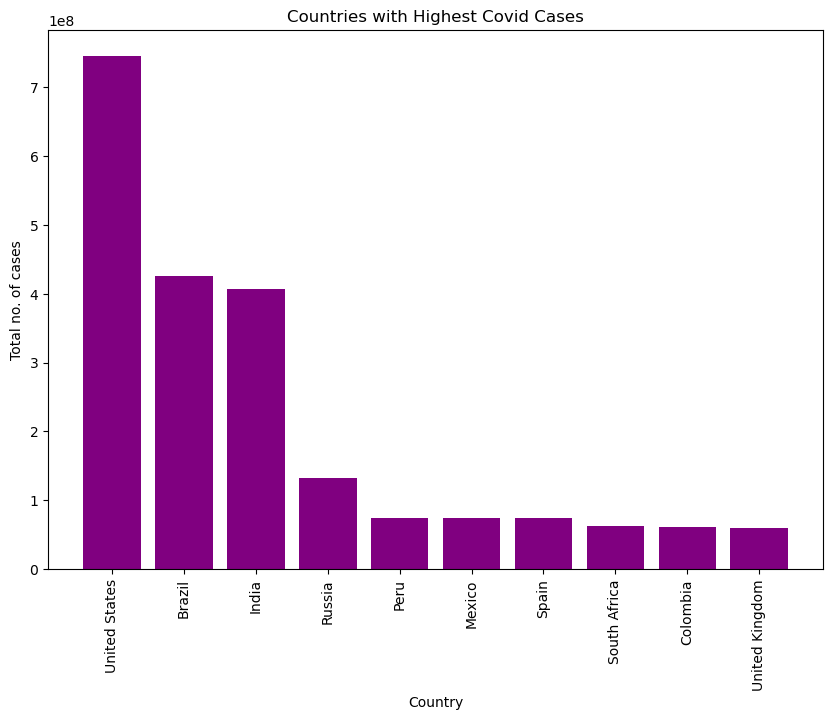

In [40]:
fig = plt.figure(figsize=(10, 7))
x = data["Country"].head(10)
y = data["Total Cases"].head(10)
plt.xlabel("Country")
plt.ylabel("Total no. of cases")
plt.title("Countries with Highest Covid Cases")
plt.bar(x,y, color='Purple')
plt.xticks(rotation=90)
plt.show()

#### Lets find out the country with the highest death cases occured

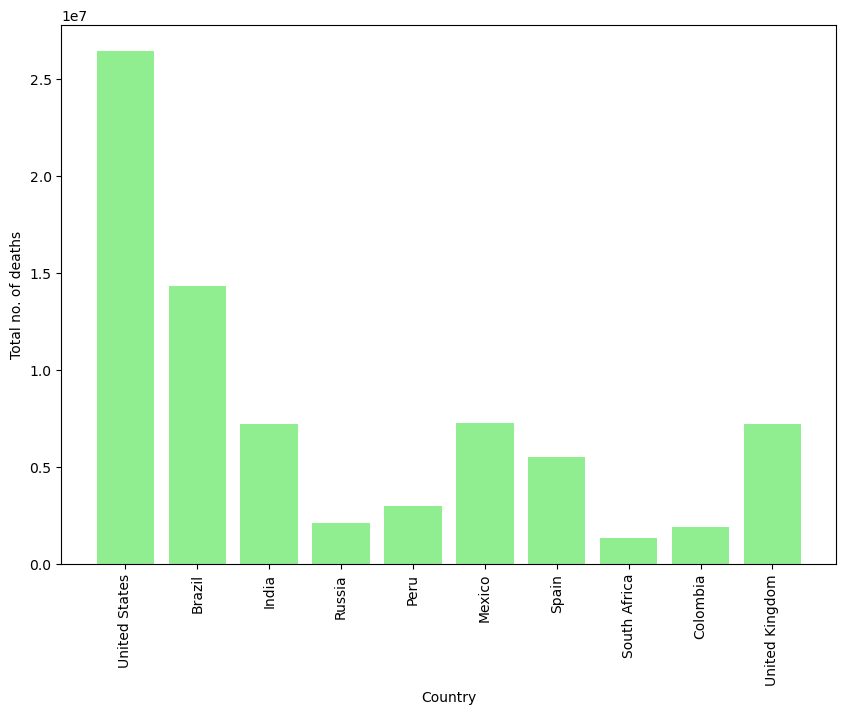

In [41]:
fig = plt.figure(figsize=(10,7))
x = data["Country"].head(10)
y = data["Total Deaths"].head(10)
plt.xlabel("Country")
plt.ylabel("Total no. of deaths")
plt.xticks(rotation=90)
plt.bar(x,y, color='lightgreen')
plt.show()

#### The total no. of Deaths & Cases occured per each country

In [42]:
fig = plt.figure(figsize=(10,7))
x = data["Country"].head(10)
y = data["Total Cases"].head(10)
z = data["Total Deaths"].head(10)
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, y, 0.4, label = 'Total Cases', color = 'palegreen')
plt.bar(x_axis + 0.2, z, 0.4, label = 'Total Deaths', color = 'skyblue')
plt.xticks(x_axis, x)
plt.xlabel("Countries")
plt.ylabel("Cases & Deaths")
plt.title("No. of cases & deaths in each country")
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### The percentage of the no. of cases & deaths

In [34]:
cases_per = data["Total Cases"].head().sum()
deaths_per = data["Total Deaths"].head().sum()
print("The Percentage of the cases : ", cases_per)
print("The Percentage of the deaths : ",deaths_per)

The Percentage of the cases :  1787261876.0
The Percentage of the deaths :  53217077.0


#### The pie chart, for the percentage of the total no. of cases & deaths

In [46]:
values = [cases_per, deaths_per]
mylabels = ["cases", "deaths"]
mycolor = ["pink","lightblue"]
plt.pie(values, labels=mylabels,colors=mycolor,autopct='%.2f')
plt.title("Percenatge of cases & deaths", fontsize=14, color='m')
plt.legend()

#### The Death rate of all the countries

In [48]:
death_rate = (data["Total Deaths"].sum()/data["Total Cases"].sum())*100
print("The death rate is : ",death_rate)

The death rate is :  3.6144212045653767


#### Lets find out the country with highest & lowest Stringency Index
(Stringency Index: school closures; workplace closures; cancellation of public events; restrictions on public gatherings; closures of public transport; stay-at-home requirements; public information campaigns; restrictions on internal movements)

In [60]:
fig = plt.figure(figsize=(10,7))
x = data["Country"].head(10)
y = data["Stringency Index"].head(10)
plt.bar(x,y, color = 'brown')
plt.title("Stringency Index during covid 19")
plt.xlabel("Country")
plt.ylabel("Stringency Index")
plt.xticks(rotation=90)
plt.show()

## Analyzing Covid-19 Impacts on Economy
 Now let’s move to analyze the impacts of covid-19 on the economy. Here the GDP per capita is the primary factor for analyzing the economic slowdowns caused due to the outbreak of covid-19. Let’s have a look at the GDP per capita before the outbreak of covid-19 among the countries with the highest number of covid-19 cases:

### GDP (Gross Domestic Product)
GDP before the covid

In [61]:
fig = plt.figure(figsize=(10,7))
x = data["Country"]
y = data["GDP Before Covid"].head(10)
plt.bar(x,y, color = 'dodgerblue')
plt.title("GDP Before covid 19")
plt.xlabel("Country")
plt.ylabel("GDP Before covid")
plt.xticks(rotation=90)
plt.show()

#### GDP during the covid

In [62]:
fig = plt.figure(figsize=(10, 7))
x = data["Country"].head(10)
y = data["GDP During Covid"].head(10)
plt.bar(x,y,color = 'dodgerblue')
plt.title("GDP During Covid")
plt.xlabel("Country")
plt.ylabel("GDP During Covid")
plt.xticks(rotation = 90)
plt.show()

#### The total over look of the GDP before & during the covid

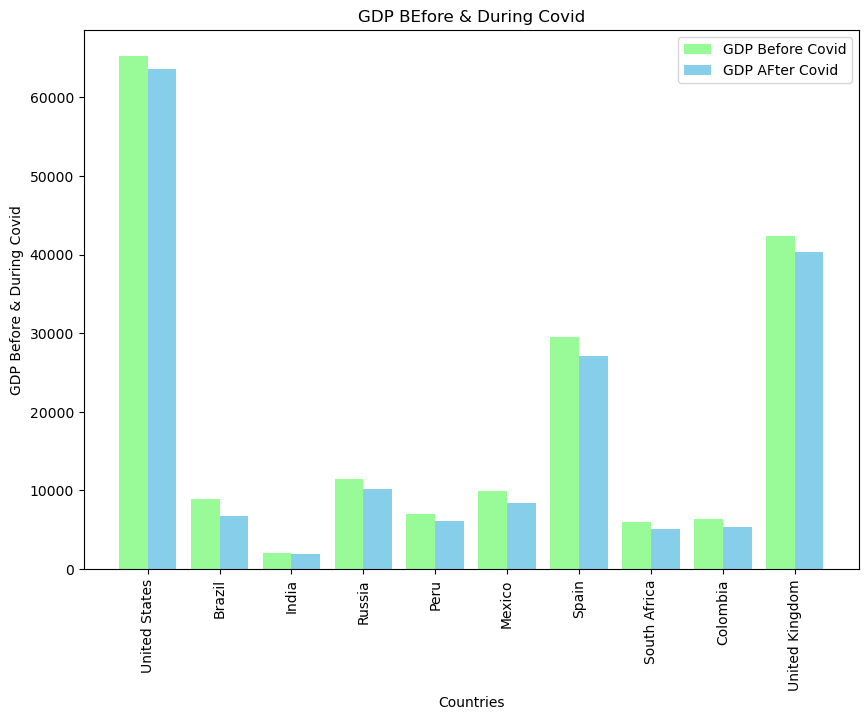

In [64]:
fig = plt.figure(figsize=(10,7))
x = data["Country"].head(10)
y = data["GDP Before Covid"].head(10)
z = data["GDP During Covid"].head(10)
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2, y, 0.4, label = "GDP Before Covid", color='palegreen')
plt.bar(x_axis+0.2,z,0.4, label = "GDP AFter Covid", color='skyblue')

plt.xticks(x_axis, x)
plt.xlabel("Countries")
plt.ylabel("GDP Before & During Covid")
plt.title("GDP BEfore & During Covid")
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Human Development Index
One other important economic factor is Human Development Index. It is a statistic composite index of life expectancy, education, and per capita indicators. Let’s have a look at how many countries were spending their budget on the human development:

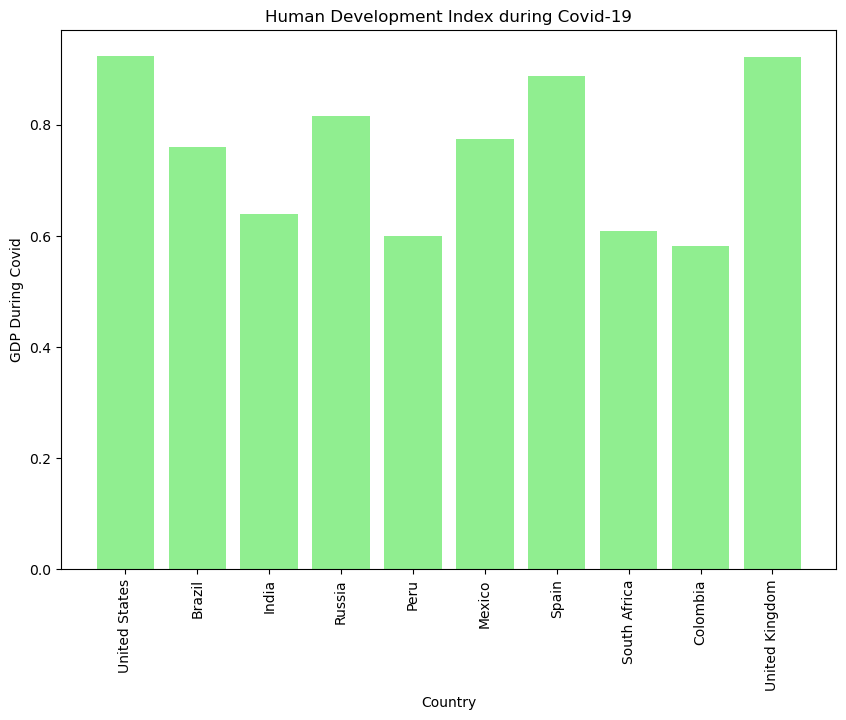

In [66]:
fig = plt.figure(figsize=(10, 7))
x = data["Country"].head(10)
y = data["Human Development Index"].head(10)
plt.bar(x,y,color='lightgreen')
plt.title("Human Development Index during Covid-19")
plt.xlabel("Country")
plt.ylabel("GDP During Covid")
plt.xticks(rotation=90)
plt.show()

### Conclusion
In this task, we studied the spread of covid-19 among the countries and its impact on the global economy. We saw that the outbreak of covid-19 resulted in the highest number of covid-19 cases and deaths in the united states. One major reason behind this is the stringency index of the United States. It is comparatively low according to the population. We also analyzed how the GDP per capita of every country was affected during the outbreak of covid-19.